In [ ]:
import pandas, warnings, os, urllib, pathlib

import numpy as np

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

In [ ]:
def GitFile(local, user, repo, folder, gitfile, branch='main'):
  """
  Download GitHub Raw File if Unavailable Locally
  """
  if not os.path.exists(local):

    url = f"https://raw.githubusercontent.com/{user}/{repo}/{branch}/{folder}/{gitfile}"

    urllib.request.urlretrieve(url, local)

  return pathlib.Path(local)

In [ ]:
data = "airline.csv"

airline = pandas.read_table(data, sep=",", parse_dates=["Month"])

airline.columns = ["Month", "Total"]

airline = airline.set_index("Month")

airline.iloc[:5]

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airline.tail()

,Total
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
null = airline.isnull().sum()

null.sum()

np.int64(0)

In [ ]:
airline.index.min()

Timestamp('1949-01-01 00:00:00')

In [ ]:
airline[airline['Total'] == airline['Total'].min()]

,Total
Month,
1949-11-01,104


In [ ]:
airline.index.max()

Timestamp('1960-12-01 00:00:00')

In [ ]:
airline[airline['Total'] == airline['Total'].max()]

,Total
Month,
1960-07-01,622


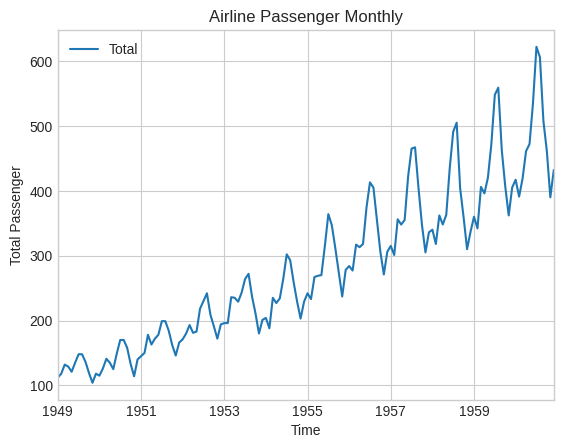

In [ ]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

airline.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

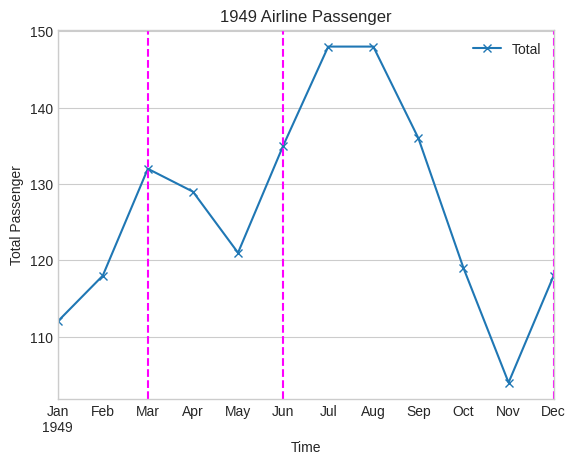

In [ ]:
title = "1949 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1949-12-01"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

for lab in ["1949-03", "1949-06", "1949-12"]:

  axes.axvline(lab, color="magenta", linestyle="--")

In [ ]:
total = airline.groupby(airline.index.year).sum()

total.iloc[:5]

,Total
Month,
1949,1520
1950,1676
1951,2042
1952,2364
1953,2700


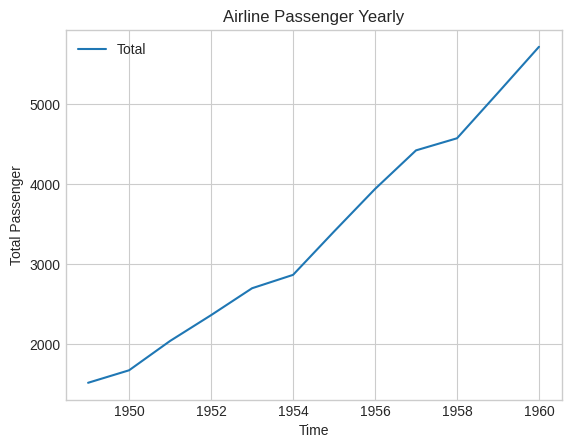

In [ ]:
title = "Airline Passenger Yearly"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

In [ ]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

aircompositional = seasonal_decompose(airline)

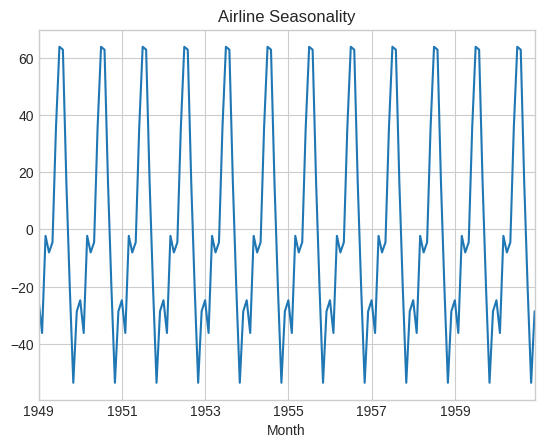

In [ ]:
title  = "Airline Seasonality"

aircompositional.seasonal.plot(title=title);

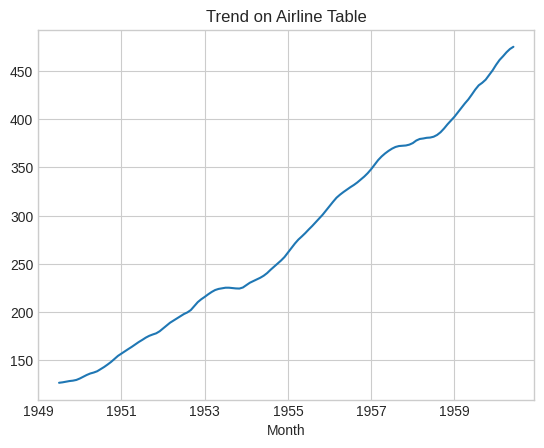

In [ ]:
title  = "Trend on Airline Table"

aircompositional.trend.plot(title=title);